### Customer Segmentation
* Mall customer segmentation is UNSUPERVISED learning problem. 
* It is really a way to find relation among the data when you don't have a target or lable in the data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('seaborn') # ggplot2

In [14]:
# loading data
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
data.shape

(200, 5)

### Data Exploration

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [18]:
mall_data = data.copy(deep= True)
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# drop unnecessary attributes
mall_data.drop(columns= 'CustomerID', inplace= True)
mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Exploartory Data Analysis

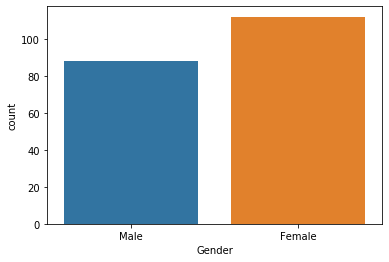

In [7]:
sns.countplot(x = 'Gender', data = mall_data)
plt.show()

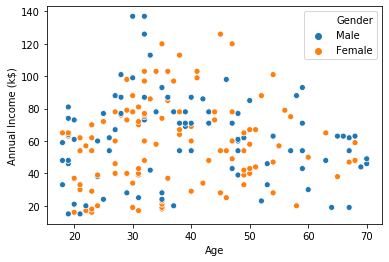

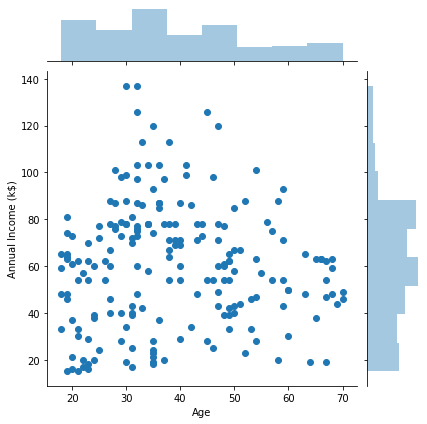

In [8]:
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', data = mall_data, hue = 'Gender')
sns.jointplot(x = 'Age', y = 'Annual Income (k$)', data = mall_data)
plt.show()

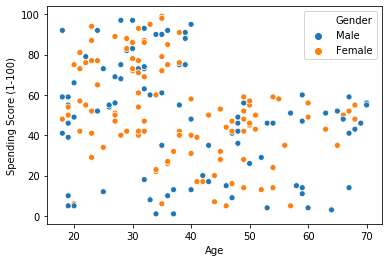

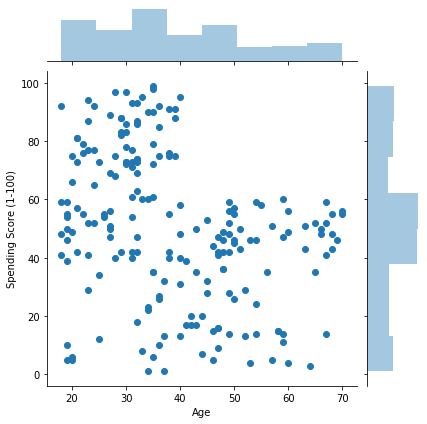

In [9]:
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = mall_data, hue = 'Gender')
sns.jointplot(x = 'Age', y = 'Spending Score (1-100)', data = mall_data)

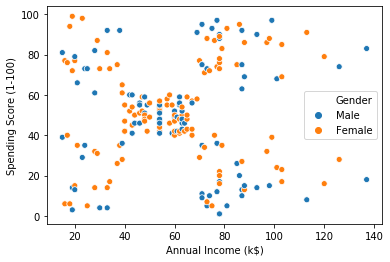

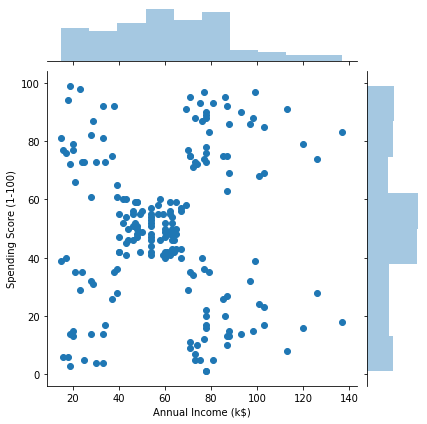

In [10]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall_data, hue = 'Gender')
sns.jointplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = mall_data)

### Possible Segmentations (clusters) : 
    1. low annual income and low spending score 
    2. high annual income and low spending score 
    3. low annual income and high spending score 
    4. high annual income and high spending score 
    5. average annual income and average spending score 
    
- so finally found best clusters between annual income and spending score so lets build the clustering around it    

In [20]:
## preparing the data
mall_data.iloc[:, [2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


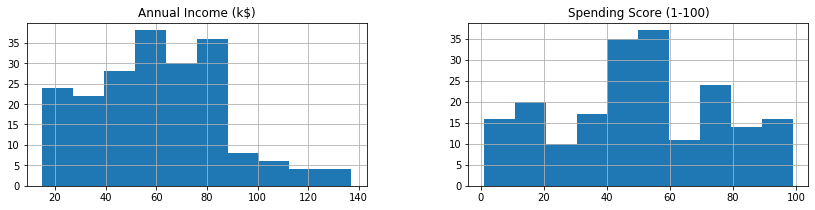

In [21]:
# check data distribution
mall_data.iloc[:, [2,3]].hist(figsize = (14,3))
plt.show()

In [22]:
X = mall_data.iloc[:, [2,3]].values

In [23]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

-  **Note** : we can add many features to final data if they really give meaningful infomation 

### Finding optimal number of clusters using elbow method

In [24]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state= 15)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

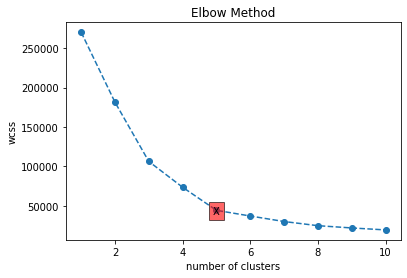

In [27]:
plt.plot(range(1,11), wcss, marker = 'o',linestyle = 'dashed')
plt.text(4.9,40000, 'X',bbox=dict(facecolor='red', alpha=0.6) )
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

*It is clear from the elbow curve, **5 clusters** will solve the problem* 

### Feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**Feature scaling is important because the model uses distances to figure clusters**

### Model Building

In [29]:
# Training the KMeans model with n_clusters=5
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans_model.fit_predict(X)

In [30]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [31]:
data_segments = pd.concat([mall_data, pd.DataFrame(y_kmeans, columns= ['Segment'])], axis= 1)
data_segments.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3


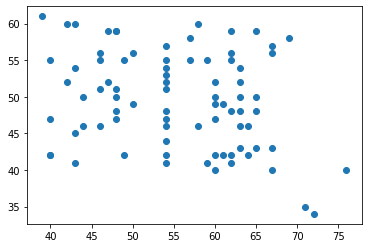

In [41]:
df = data_segments[data_segments['Segment'] == 1][['Annual Income (k$)','Spending Score (1-100)']]
plt.scatter(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'])
plt.show()

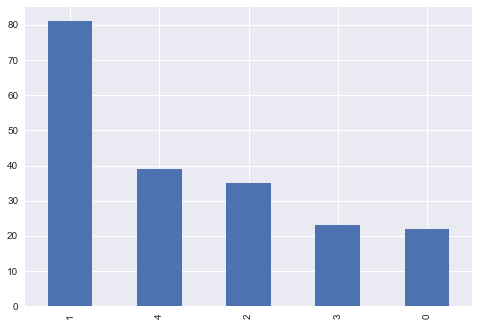

In [36]:
# customers on segment bases
data_segments['Segment'].value_counts().plot(kind = 'bar')
plt.show()

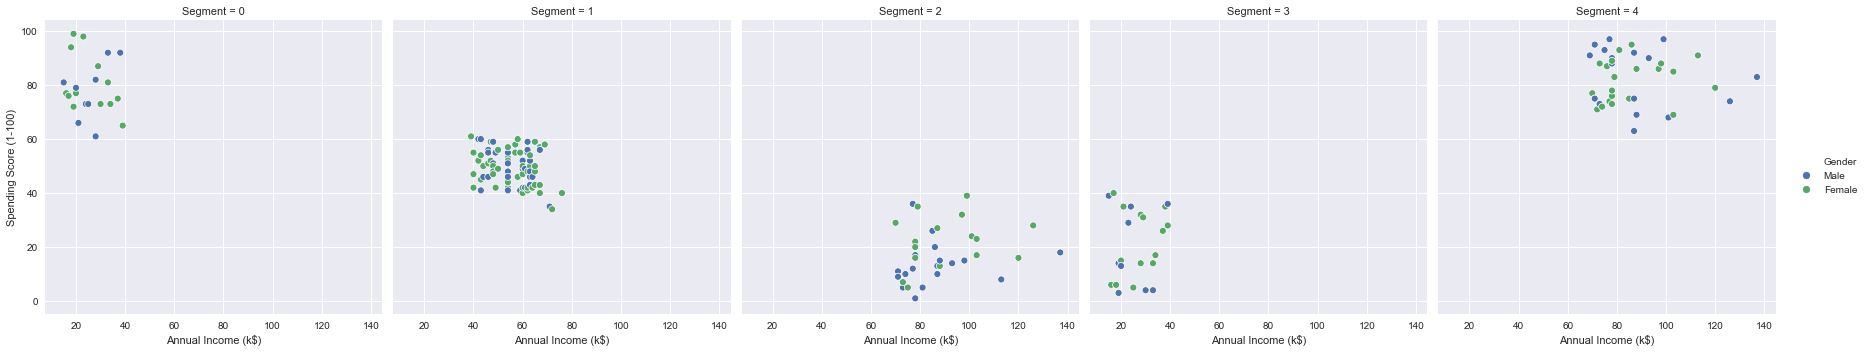

In [37]:
# segmentwise customer data based on gender
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',kind = 'scatter' ,data = data_segments, hue = 'Gender', col = 'Segment')
plt.show()

### Clusters

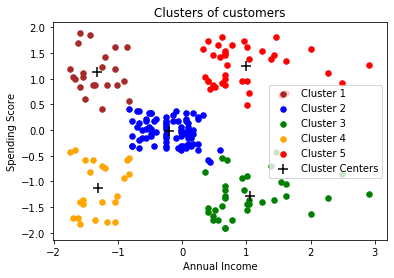

In [42]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'brown', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'red', label = 'Cluster 5')
plt.scatter(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], s=100, c='black', marker='+', label='Cluster Centers')
plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Agglomerative Clustering (Hierarchy Clustering)

In [15]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

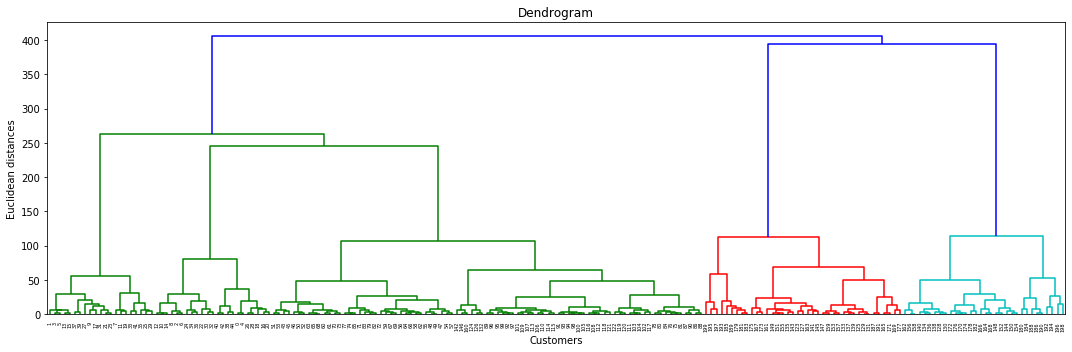

In [20]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.tight_layout()
plt.show()

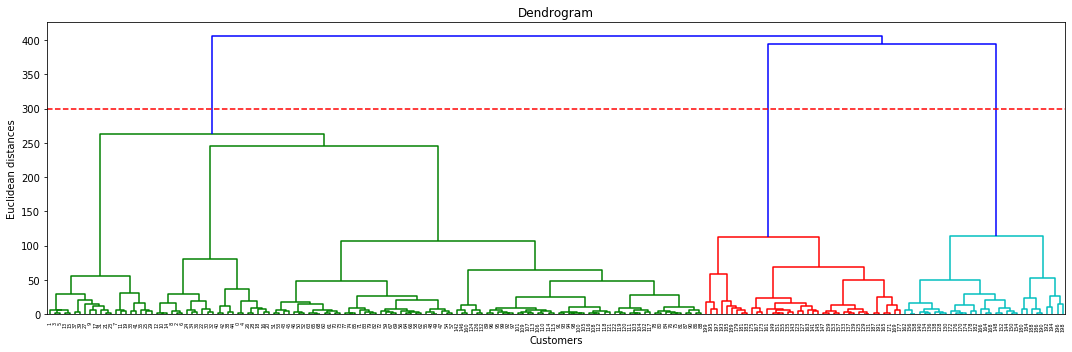

In [22]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.axhline(y=300, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)